In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os

In [74]:
infile = "C:\\Users\\LuizF\\Downloads\\Magnetometer15012022\\"


_, _, files = next(os.walk(infile))

filename = files[0]

def setting_dataframe(infile, filename):
    """
    Function for organize the magnetometer data
    from EMBRACE
    
    """
    df = pd.read_csv(infile + filename, header = 1, delim_whitespace = True)

    df.rename(columns = {'YYYY': 'year', 'MM': 'month', 'DD': 'day', 
                             'HH':'hour', 'MM.1':'minute'}, inplace = True)

    df.index = pd.to_datetime(df[['day', 'month', 'year', 'hour', 'minute']],  
                              infer_datetime_format=True)

    return df

df = setting_dataframe(infile, filename)

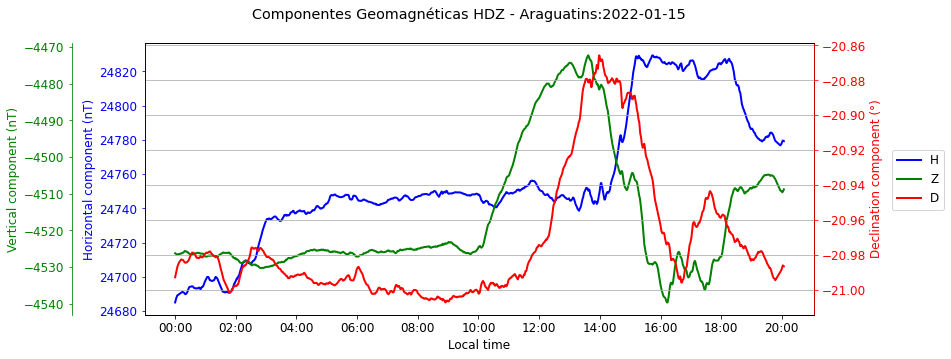

In [72]:
fig, ax = plt.subplots(figsize = (12, 5))

def setting_axes(ax, color = 'red', position = 'left'):
    ax.yaxis.label.set_color(color)
    ax.spines[position].set_color(color)
    ax.tick_params(axis = 'y', colors = color)

############### First axes ############
#horizontal component
left_color = 'blue'
ax.plot(df['H(nT)'], color = left_color, lw = 2, label = 'H')
setting_axes(ax, color = left_color, position = 'left')

ax.set(ylabel = 'Horizontal component (nT)')

############### Second axes ############
out_ax = ax.twinx()

out_ax.yaxis.set_ticks_position('left') 
out_ax.yaxis.set_label_position('left') 
out_ax.spines['left'].set_position(('outward', 73))

#setting the color
out_color = 'green'
out_ax.plot(df['Z(nT)'], color = out_color, lw = 2, label = "Z")
setting_axes(out_ax, color = out_color, position = 'left')
out_ax.set(ylabel = 'Vertical component (nT)')

############### Third axes ############

right_ax = ax.twinx()

right_color = 'red'
right_ax.plot(df['D(Deg)'], color = right_color, lw = 2, label = 'D')
setting_axes(right_ax, color = right_color, position = 'right')
right_ax.set(ylabel = 'Declination component (°)')

### Setting datetime on the bottom axes 
import matplotlib.dates as dates

ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(dates.HourLocator(interval = 2))


fig.legend(bbox_to_anchor=[1.02, 0.5], 
           loc='center', ncol=1)

ax.set(xlabel = 'Local time')

date = df.index[0].date()
acr = filename[:3]

fig.suptitle(f"Componentes Geomagnéticas HDZ - {sites[acr].capitalize()}: {date}")

plt.rcParams.update({'font.size': 12})  

plt.grid(True)

plt.show()


In [71]:
sites = {'ara': 'ARAGUATINS', 
        'cba': 'CUIABA', 
        'eus': 'EUSEBIO', 
        'jat': 'JATAI', 
        'rga': 'RIO GRANDE', 
        'sjc': 'SAO JOSE DOS CAMPOS', 
        'slz': 'SAO LUIS', 
        'sms': 'SAO MARTINHO DA SERRA', 
        'tcm': 'TUCUMAN', 
        'vss': 'VASSOURAS'}



'Araguatins'

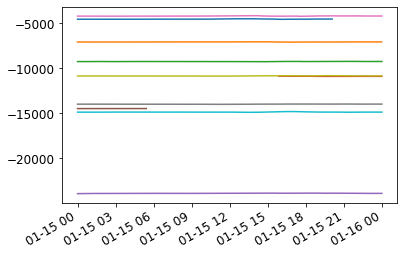

In [76]:
for filename in files:
    df = setting_dataframe(infile, filename)
    df['Z(nT)'].plot()